In [33]:
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from credentials import *

In [35]:
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    api = tweepy.API(auth)
    return api   


In [36]:
extractor = twitter_setup()
tweets = extractor.user_timeline(screen_name = "narendramodi", count = 200)
print("Number of tweets extracted : {}.\n".format(len(tweets)))

print("5 recent tweets :\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted : 200.

5 recent tweets :

I thank the wonderful people of Leh for the warm welcome. I am delighted to be here. https://t.co/XmogPkc64v

Birthday greetings to Mr. Lal Thanhawla, the Chief Minister of Mizoram. May he be blessed with wonderful health and a long life.

Birthday greetings to my valued colleague and senior leader Shri Thaawarchand Gehlot Ji. Thaawarchand Ji is at the… https://t.co/MpdhqNWNAg

Spoke to our former Prime Minister Shri HD Deve Gowda Ji and conveyed birthday wishes to him. I pray for his good health and long life.

Ramzan greetings to everyone. We recall the pious thoughts of Paighambar Mohammad Sahab, who highlighted the import… https://t.co/EYhztmgP31



In [37]:
data = pd.DataFrame(data =[tweet.text for tweet in tweets], columns = ['Tweets'])
display(data.head(10))

,Tweets
0,I thank the wonderful people of Leh for the wa...
1,"Birthday greetings to Mr. Lal Thanhawla, the C..."
2,Birthday greetings to my valued colleague and ...
3,Spoke to our former Prime Minister Shri HD Dev...
4,Ramzan greetings to everyone. We recall the pi...
5,سبھی کو مقدس ماہِ رمضان کی مبارکباد ! ہم پیغمب...
6,I congratulate my sisters and brothers of Jhar...
7,We are committed to the welfare of our farmers...
8,The proposed National Institute of Mental Heal...
9,A decision that will benefit the people of Noi...


In [38]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [39]:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [40]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,I thank the wonderful people of Leh for the wa...,108,997696358378287104,2018-05-19 04:32:02,Twitter for iPhone,5410,1048
1,"Birthday greetings to Mr. Lal Thanhawla, the C...",128,997685817135923200,2018-05-19 03:50:09,Twitter for iPhone,7573,1126
2,Birthday greetings to my valued colleague and ...,139,997326300124667904,2018-05-18 04:01:34,Twitter for iPhone,12113,2067
3,Spoke to our former Prime Minister Shri HD Dev...,135,997324954013126656,2018-05-18 03:56:13,Twitter for iPhone,37521,6238
4,Ramzan greetings to everyone. We recall the pi...,140,997063852352245761,2018-05-17 10:38:41,Twitter Web Client,13691,2844
5,سبھی کو مقدس ماہِ رمضان کی مبارکباد ! ہم پیغمب...,140,997063547036168192,2018-05-17 10:37:28,Twitter Web Client,9570,2052
6,I congratulate my sisters and brothers of Jhar...,140,996755246012563458,2018-05-16 14:12:24,Twitter for iPhone,17068,3470
7,We are committed to the welfare of our farmers...,125,996754150175240197,2018-05-16 14:08:02,Twitter for iPhone,8798,1886
8,The proposed National Institute of Mental Heal...,140,996753488683192320,2018-05-16 14:05:25,Twitter for iPhone,9470,2075
9,A decision that will benefit the people of Noi...,104,996752901434462208,2018-05-16 14:03:05,Twitter for iPhone,7737,1750


In [41]:
mean = np.mean(data['len'])
print("The average length of every tweet is: {}".format(mean))

fav_max = np.max(data['Likes']) 
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0] 
rt = data[data.RTs == rt_max].index[0]

print("The tweet with more likes is: \n{}".format(data['Tweets'][fav])) 
print("The number of likes: {}".format(fav_max)) 
print("{} characters.\n".format(data['len'][fav]))

print("The tweet with most retweets is: \n{}".format(data['Tweets'][rt])) 
print("Number of retweets: {}".format(rt_max)) 
print("{} characters. \n".format(data['len'][rt]))


The average length of every tweet is: 128.78
The tweet with more likes is: 
I thank my sisters and brothers of Karnataka for steadfastly supporting the BJP’s development agenda and making BJP… https://t.co/Pi5aJ6a0K3
The number of likes: 44766
140 characters.

The tweet with most retweets is: 
I thank my sisters and brothers of Karnataka for steadfastly supporting the BJP’s development agenda and making BJP… https://t.co/Pi5aJ6a0K3
Number of retweets: 10357
140 characters. 



In [42]:
tlen = pd.Series(data = data['len'].values, index = data['Date'])
tfav = pd.Series(data = data['Likes'].values, index = data['Date'])
tret = pd.Series(data = data['RTs'].values, index = data['Date'])

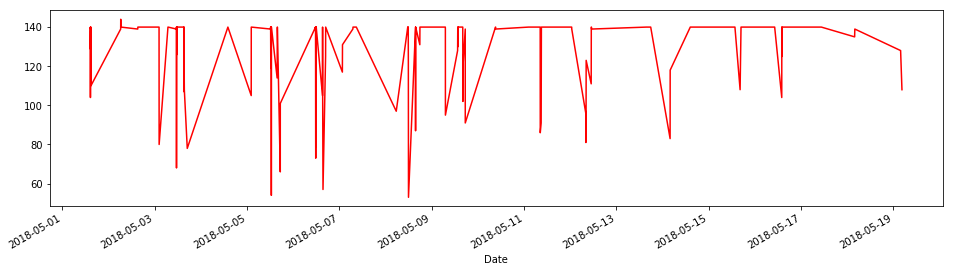

In [43]:
tlen.plot(figsize=(16,4),color='r')

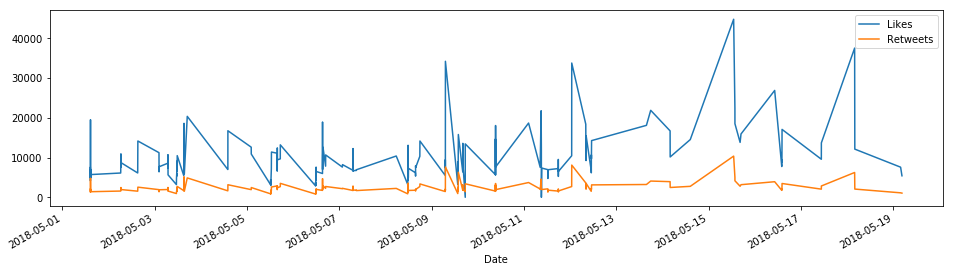

In [44]:
tfav.plot(figsize=(16,4), label='Likes', legend=True)
tret.plot(figsize=(16,4),label='Retweets',legend=True)

In [45]:
from textblob import TextBlob
import re

In [46]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [47]:
data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets']])
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,I thank the wonderful people of Leh for the wa...,108,997696358378287104,2018-05-19 04:32:02,Twitter for iPhone,5410,1048,1
1,"Birthday greetings to Mr. Lal Thanhawla, the C...",128,997685817135923200,2018-05-19 03:50:09,Twitter for iPhone,7573,1126,1
2,Birthday greetings to my valued colleague and ...,139,997326300124667904,2018-05-18 04:01:34,Twitter for iPhone,12113,2067,0
3,Spoke to our former Prime Minister Shri HD Dev...,135,997324954013126656,2018-05-18 03:56:13,Twitter for iPhone,37521,6238,1
4,Ramzan greetings to everyone. We recall the pi...,140,997063852352245761,2018-05-17 10:38:41,Twitter Web Client,13691,2844,0
5,سبھی کو مقدس ماہِ رمضان کی مبارکباد ! ہم پیغمب...,140,997063547036168192,2018-05-17 10:37:28,Twitter Web Client,9570,2052,0
6,I congratulate my sisters and brothers of Jhar...,140,996755246012563458,2018-05-16 14:12:24,Twitter for iPhone,17068,3470,0
7,We are committed to the welfare of our farmers...,125,996754150175240197,2018-05-16 14:08:02,Twitter for iPhone,8798,1886,0
8,The proposed National Institute of Mental Heal...,140,996753488683192320,2018-05-16 14:05:25,Twitter for iPhone,9470,2075,-1
9,A decision that will benefit the people of Noi...,104,996752901434462208,2018-05-16 14:03:05,Twitter for iPhone,7737,1750,0


In [48]:
pos_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [49]:
print("Percentage of Positive Tweets : {}%".format(len(pos_tweets) / len(data['Tweets']) * 100))

Percentage of Positive Tweets : 40.5%


In [50]:
print("Percentage of Neutral Tweets : {}%".format(len(neu_tweets) / len(data['Tweets']) * 100))
print("Percentage of Negative Tweets : {}%".format(len(neg_tweets) / len(data['Tweets']) * 100))

Percentage of Neutral Tweets : 50.0%
Percentage of Negative Tweets : 9.5%


In [1]:
import os
import pymongo
import json

In [2]:
mng_client = pymongo.MongoClient('localhost',27017)
mng_db = mng_client['TwitterData']
collection_name = 'sentimentAnalysisData'
db_cm = mng_db[collection_name]

In [3]:
data_json = json.loads(data.to_json(orient='records'))
db_cm.remove
db_cm.insert_many(data_json)

NameError: name 'data' is not defined

In [4]:
from flask import Flask, request, redirect, url_for, render_template, jsonify, make_response
import datetime, random
    
from io import BytesIO
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt;

import pymongo
import json

In [ ]:
app = Flask(__name__)


@app.route("/")
def index():
    return render_template('index1.html')

@app.route('/processInput', methods=['GET','POST'])
def insert():
    msg=""
    if request.method=='POST':
        try:
            handle=request.form['handle']
            tweetCount=request.form['tweetCount']
            extractor = twitter_setup()
            tweets = extractor.user_timeline(screen_name = handle, count = tweetCount)
            print("Number of tweets extracted : {}.\n".format(len(tweets)))
            dummy = []
            topTweets = []
            sentimentAnalysis = []
            print("5 recent tweets :\n")
            for tweet in tweets[:5]:
                
                dummy.append(tweet.text)
            
            #print(dummy)
            data = pd.DataFrame(data =[tweet.text for tweet in tweets], columns = ['Tweets'])
            data['len'] = np.array([len(tweet.text) for tweet in tweets])
            data['ID'] = np.array([tweet.id for tweet in tweets])
            data['Date'] = np.array([tweet.created_at for tweet in tweets])
            data['Source'] = np.array([tweet.source for tweet in tweets])
            data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
            data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])
            
            
            
            mean = np.mean(data['len'])
            topTweets.append("The average length of every tweet is: " + str(mean))
            
            fav_max = np.max(data['Likes']) 
            rt_max = np.max(data['RTs'])

            fav = data[data.Likes == fav_max].index[0] 
            rt = data[data.RTs == rt_max].index[0]

            topTweets.append("The tweet with more likes is: " + str(data['Tweets'][fav])) 
            topTweets.append("The number of likes: " + str(fav_max)) 
            topTweets.append(str(data['len'][fav]) + " characters.")

            topTweets.append("The tweet with most retweets is: " + str(data['Tweets'][rt])) 
            topTweets.append("Number of retweets: " + str(rt_max)) 
            topTweets.append(str(data['len'][rt]) + " characters. ")
            
            data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets']])
            pos_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
            neu_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
            neg_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]
            sentimentAnalysis.append("Percentage of Positive Tweets : " + str(len(pos_tweets) / len(data['Tweets']) * 100) + "%")
            sentimentAnalysis.append("Percentage of Neutral Tweets : " + str(len(neu_tweets) / len(data['Tweets']) * 100) + "%")
            sentimentAnalysis.append("Percentage of Negative Tweets : " + str(len(neg_tweets) / len(data['Tweets']) * 100) + "%")
                        
            tlen = pd.Series(data = data['len'].values, index = data['Date'])
            tfav = pd.Series(data = data['Likes'].values, index = data['Date'])
            tret = pd.Series(data = data['RTs'].values, index = data['Date'])     

            plt.figure()
            tlen.plot(figsize=(16,4),label="Length of Tweets", legend=True)
            plt.savefig('static/tlenplot.png')
            
            plt.figure()
            tfav_plot = tfav.plot(figsize=(16,4), label='Likes', legend=True)
            plt.savefig('static/tfavplot.png')
            
            plt.figure()
            tret_plot = tret.plot(figsize=(16,4),label='Retweets',legend=True)
            plt.savefig('static/tretplot.png')
            
            mng_client = pymongo.MongoClient('localhost',27017)
            mng_db = mng_client['TwitterData']
            collection_name = 'sentimentAnalysisData'
            db_cm = mng_db[collection_name]
            data_json = json.loads(data.to_json(orient='records'))
            db_cm.remove
            db_cm.insert_many(data_json)
            
            
            return render_template('displayResults.html',dummy = dummy, topTweets = topTweets, sentimentAnalysis = sentimentAnalysis)
    
        
        except:
            print("error !")
            return render_template('error.html')
        
@app.route("/error")
def error():
    return render_template('error.html')


app.run(port=5002)

 * Running on http://127.0.0.1:5002/ (Press CTRL+C to quit)
127.0.0.1 - - [19/May/2018 11:33:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2018 11:33:18] "POST /processInput HTTP/1.1" 200 -


error !
